## Assignment 4
1. As we did in the digits case study, run multiple classification estimators for the **Iris** dataset and compate the results to see which one performs the best. 
2. In the k-nearest neighbors algorithm, the computtion time for classsifying samples increases with the value of ***k***. Use ```%timeit``` to calculate the run time of hte KNeighborsClassifier cross-validation for the Digits dataset. Use values of 1, 10 and 20 for ***k***. Compare the results and display them in a graph.
3. Investigate the Diabetes dataset bundled with scikit-learn. The dataset contains 442 samples, each with 10 features and a label indicating the "disease progression one year after baseline". Using this dataset, reimplement the steps of the multiple linear regression case study in Section 15.5

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('dark')

from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [5]:
iris = datasets.load_iris()

In [19]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=11)  # random_state for reproducibility

# 1.)
As we did in the digits case study, run multiple classification estimators for the **Iris** dataset and compate the results to see which one performs the best.

#### KNN

In [9]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
predicted = knn.predict(X=X_test)
expected = y_test

In [13]:
print("Predicted:", predicted[:20])
print("Expected: ", expected[:20])

Predicted: [2 2 2 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2]
Expected:  [2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2]


In [14]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print("Wrong:", wrong)

Wrong: [(1, 2)]


In [20]:
print(f'{knn.score(X_test, y_test):.2%}')

97.37%


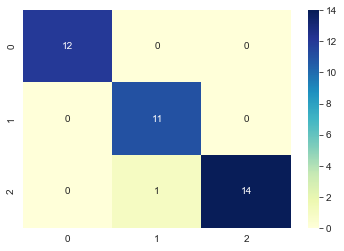

In [110]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
figure = plt.figure(figsize=(6, 4))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.YlGnBu) 

#### K Fold

In [49]:
kfold = KFold(n_splits=3, random_state=11, shuffle=True)

In [50]:
scores = cross_val_score(estimator=knn, X=iris.data, y=iris.target, cv=kfold)

In [51]:
print("Scores: ", scores)
print(f'Mean accuracy: {scores.mean():.2%}')

Scores:  [0.98 0.96 1.  ]
Mean accuracy: 98.00%


#### KNeighborsClassifier, SVC, GaussianNB

In [54]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [61]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=3, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=iris.data, y=iris.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.00%; standard deviation=1.63%
                 SVC: mean accuracy=96.00%; standard deviation=1.63%
          GaussianNB: mean accuracy=94.00%; standard deviation=4.32%


### Comparison
- from KNeighborsClassifier, SVC, GaussianNB the best one is  KNeighborsClassifier by 2 percent
- from above k fold was better than knn by almost a percent

# 2.) 
In the k-nearest neighbors algorithm, the computtion time for classsifying samples increases with the value of ***k***. Use ```%timeit``` to calculate the run time of hte KNeighborsClassifier cross-validation for the Digits dataset. Use values of 1, 10 and 20 for ***k***. Compare the results and display them in a graph.

In [92]:
kfold = KFold(n_splits=3, random_state=11, shuffle=True)
knn1 = %timeit -o -r 50 KNeighborsClassifier(n_neighbors=1)

4.15 µs ± 286 ns per loop (mean ± std. dev. of 50 runs, 100000 loops each)


In [93]:
kfold = KFold(n_splits=3, random_state=11, shuffle=True)
knn2 = %timeit -o -r 50 KNeighborsClassifier(n_neighbors=10)

4.25 µs ± 331 ns per loop (mean ± std. dev. of 50 runs, 100000 loops each)


In [94]:
kfold = KFold(n_splits=3, random_state=11, shuffle=True)
knn3 = %timeit -o -r 50 KNeighborsClassifier(n_neighbors=20)

4.22 µs ± 302 ns per loop (mean ± std. dev. of 50 runs, 100000 loops each)


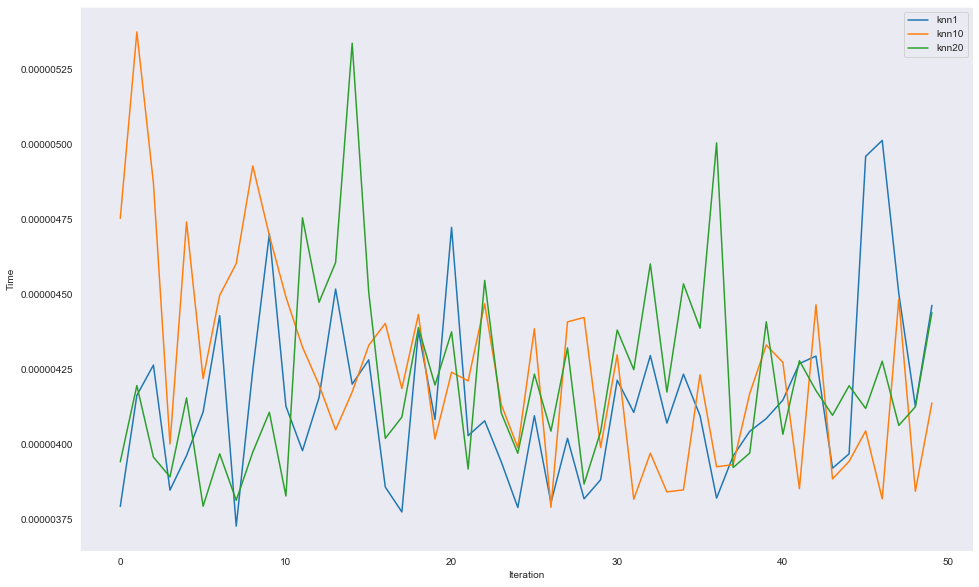

In [95]:
plt.figure(figsize=(16, 10))
plt.plot(knn1.timings, label='knn1')
plt.plot(knn2.timings, label='knn10')
plt.plot(knn3.timings, label='knn20')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.show()

### Comparison
- this kind of looks like just noise
- but it also kind of looks like knn20 takes longer then the others
- also knn10 also looks like it takes longer than knn1

# 3.)
Investigate the Diabetes dataset bundled with scikit-learn. The dataset contains 442 samples, each with 10 features and a label indicating the "disease progression one year after baseline". Using this dataset, reimplement the steps of the multiple linear regression case study in Section 15.5

In [96]:
diabetes = datasets.load_diabetes()

In [97]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [98]:
pd.set_option('precision', 4) 

In [99]:
diabetes_df = pd.DataFrame(diabetes.data, 
                             columns=diabetes.feature_names)

In [103]:
diabetes_df['Target'] = pd.Series(diabetes.target)

In [105]:
diabetes_df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0


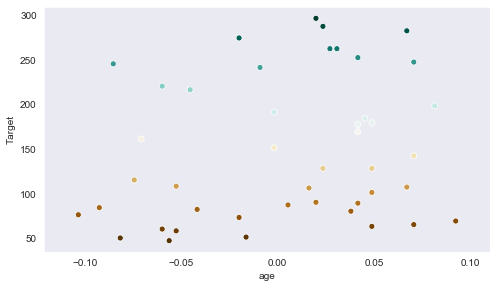

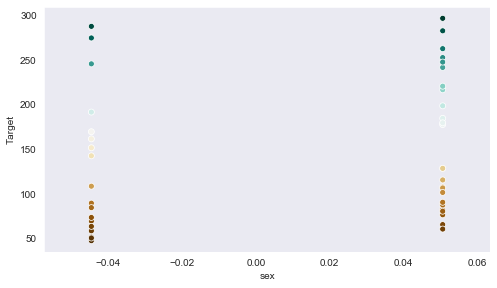

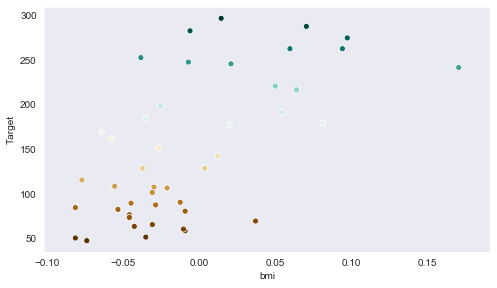

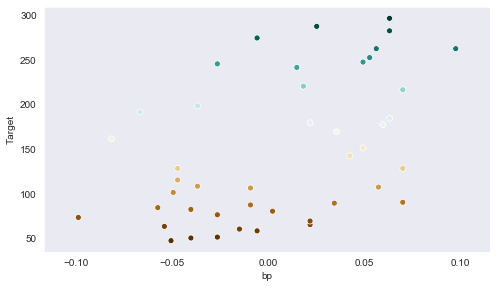

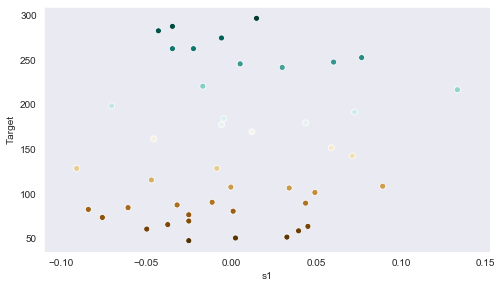

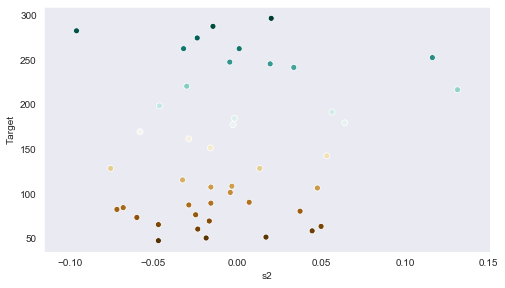

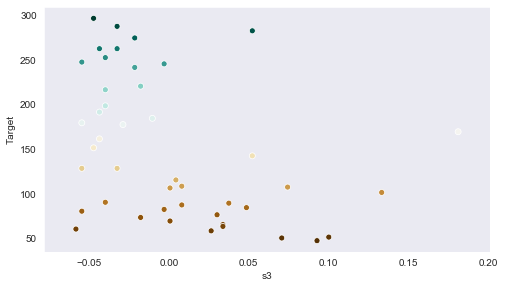

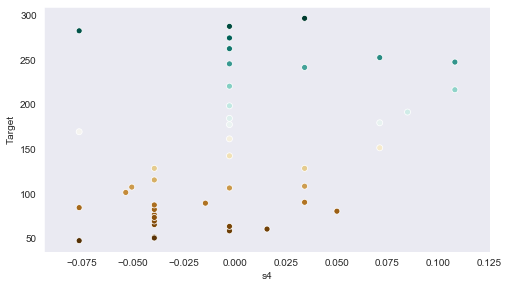

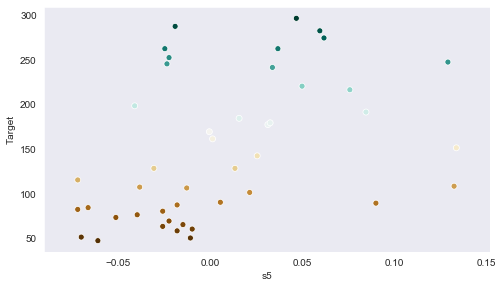

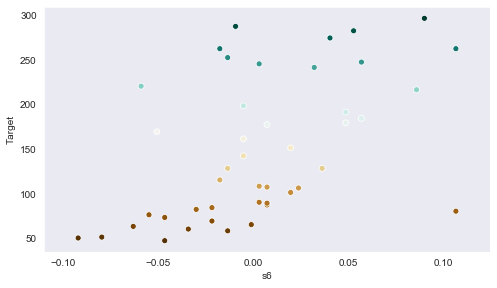

In [114]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y='Target', hue='Target', 
                    palette='BrBG', legend=False)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [118]:
linear_regression = LinearRegression()

In [119]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}') 

       age: -60.22189333188298
       sex: -266.45890749037574
       bmi: 523.0596748020045
        bp: 310.5148515916694
        s1: -336.17030792548036
        s2: 137.34454453829528
        s3: -131.1356042968855
        s4: -1.1485501589057654
        s5: 622.3374924905785
        s6: 60.46751763603529


#### Comparing Coeffients
- It looks like s4 doesn't have much of an impact on the model
- The age, sex, s1, s3 are all negtive coeiffients
- The bmi, bp, s2, s5, s6 area all positive coeiffients

In [121]:
linear_regression.intercept_

152.22835839334243

In [122]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [126]:
print("Predicted:", predicted[:4])
print("Expected: ", expected[:4])

Predicted: [115.46727109  83.46033257 160.77912055 187.65807631]
Expected:  [ 79.  55. 109. 178.]


In [127]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

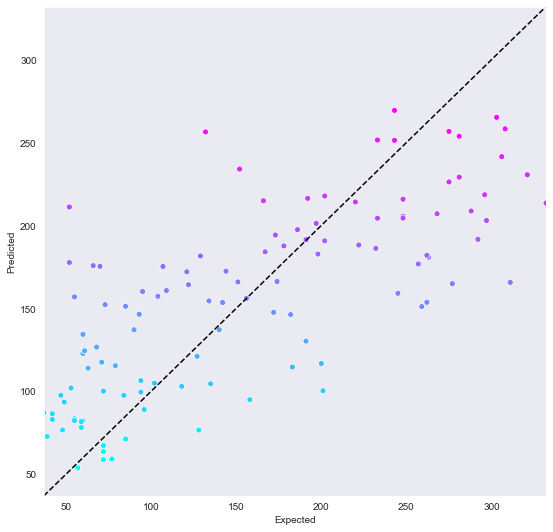

In [128]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [129]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [130]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
